In [90]:
import numpy as np 
import pandas as pd

In [91]:
import warnings
warnings.filterwarnings('ignore')

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [93]:
df=pd.read_csv('uber.csv')

In [94]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [66]:
df.rename(columns={'Unnamed: 0': 'key', 
                   'key': 'duration'}, inplace=True)

In [67]:
df.head()

,duration,duration,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   duration           200000 non-null  int64  
 1   duration           200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [70]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   duration           199999 non-null  int64  
 1   duration           199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


In [71]:
df=df[df['fare_amount']>0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199977 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   duration           199977 non-null  int64  
 1   duration           199977 non-null  object 
 2   fare_amount        199977 non-null  float64
 3   pickup_datetime    199977 non-null  object 
 4   pickup_longitude   199977 non-null  float64
 5   pickup_latitude    199977 non-null  float64
 6   dropoff_longitude  199977 non-null  float64
 7   dropoff_latitude   199977 non-null  float64
 8   passenger_count    199977 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


In [72]:
df_sorted=df.sort_values(by='fare_amount', ascending=False)
df_sorted.head()

,duration,duration,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
170081,51151143,10:00.0,499.0,2011-04-10 04:10:00 UTC,-73.968377,40.764602,-73.968368,40.76460,1
4292,33491441,20:00.0,350.0,2014-10-24 20:20:00 UTC,0.000000,0.000000,0.000000,0.00000,3
185325,20013003,00:00.0,275.0,2013-04-19 00:00:00 UTC,0.000000,0.000000,0.000000,0.00000,1
71715,38680012,31:00.0,250.0,2013-05-11 00:31:00 UTC,0.000000,0.000000,0.000000,0.00000,1
197493,54143082,39:00.0,230.0,2014-09-07 08:39:00 UTC,-73.937765,40.758267,-74.382200,40.70089,2


In [73]:
df_topfares=df_sorted.head(50)
df_topfares.head()

,duration,duration,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
170081,51151143,10:00.0,499.0,2011-04-10 04:10:00 UTC,-73.968377,40.764602,-73.968368,40.76460,1
4292,33491441,20:00.0,350.0,2014-10-24 20:20:00 UTC,0.000000,0.000000,0.000000,0.00000,3
185325,20013003,00:00.0,275.0,2013-04-19 00:00:00 UTC,0.000000,0.000000,0.000000,0.00000,1
71715,38680012,31:00.0,250.0,2013-05-11 00:31:00 UTC,0.000000,0.000000,0.000000,0.00000,1
197493,54143082,39:00.0,230.0,2014-09-07 08:39:00 UTC,-73.937765,40.758267,-74.382200,40.70089,2


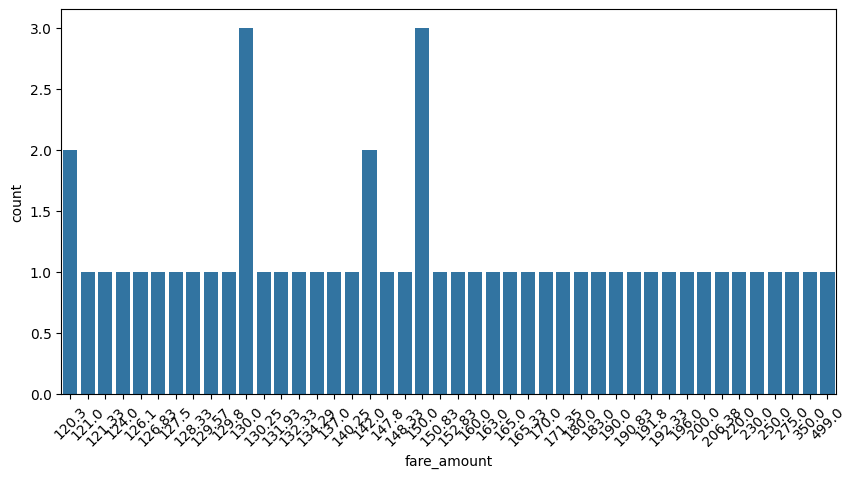

In [76]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='fare_amount',data=df_topfares)
plt.xticks(rotation=45)
plt.show()

In [77]:
df[['date','time','timezone']] =df['pickup_datetime'].str.split(' ',expand=True)
df.head()

,duration,duration,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time,timezone
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,19:52:06,UTC
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,20:04:56,UTC
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,21:45:00,UTC
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,08:22:21,UTC
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,17:47:00,UTC


In [78]:
df.drop('timezone',axis=1,inplace=True)

In [79]:
df['date']=df['date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199977 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   duration           199977 non-null  int64         
 1   duration           199977 non-null  object        
 2   fare_amount        199977 non-null  float64       
 3   pickup_datetime    199977 non-null  object        
 4   pickup_longitude   199977 non-null  float64       
 5   pickup_latitude    199977 non-null  float64       
 6   dropoff_longitude  199977 non-null  float64       
 7   dropoff_latitude   199977 non-null  float64       
 8   passenger_count    199977 non-null  int64         
 9   date               199977 non-null  datetime64[ns]
 10  time               199977 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 18.3+ MB


In [81]:
fare_per_day=df.groupby('date')[['fare_amount']].sum()
fare_per_day=fare_per_day.reset_index()
fare_per_day.head()

,date,fare_amount
0,2009-01-01,621.20
1,2009-01-02,739.55
2,2009-01-03,935.70
3,2009-01-04,733.30
4,2009-01-05,550.95


In [82]:
fare_per_day['year']=fare_per_day['date'].dt.year
fare_per_day['month']=fare_per_day['date'].dt.strftime('%B')
fare_per_day['month_num']=fare_per_day['date'].dt.month
fare_per_day.head()

,date,fare_amount,year,month,month_num
0,2009-01-01,621.20,2009,January,1
1,2009-01-02,739.55,2009,January,1
2,2009-01-03,935.70,2009,January,1
3,2009-01-04,733.30,2009,January,1
4,2009-01-05,550.95,2009,January,1


In [83]:
ride_count =df.groupby('date')[['fare_amount']].count()
ride_count['rides_num'] =ride_count['fare_amount']
ride_count.drop('fare_amount',axis=1,inplace=True)
ride_count.head()

,rides_num
date,
2009-01-01,63
2009-01-02,60
2009-01-03,84
2009-01-04,75
2009-01-05,64


In [84]:
fare_per_day.head()

,date,fare_amount,year,month,month_num
0,2009-01-01,621.20,2009,January,1
1,2009-01-02,739.55,2009,January,1
2,2009-01-03,935.70,2009,January,1
3,2009-01-04,733.30,2009,January,1
4,2009-01-05,550.95,2009,January,1


In [85]:
pivot_date= pd.pivot_table(fare_per_day, values='fare_amount',index='year',columns='month', aggfunc='mean',sort=False)
pivot_date

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2009,789.412903,792.705357,889.975806,867.031667,858.911290,852.456667,816.824194,778.226452,869.043333,837.052258,853.441000,841.946129
2010,821.278387,676.155714,738.411935,937.086000,919.370968,910.864000,850.070000,736.861613,852.377667,911.106452,848.675667,853.802581
2011,760.280000,914.135714,923.373871,934.500333,929.850323,1012.146667,867.393548,808.293548,949.070000,974.854516,966.780000,892.584194
2012,840.519355,959.051724,958.016129,975.309667,1001.345161,925.490000,891.322581,928.248065,1132.520000,1123.187097,1089.805000,1089.368387
2013,1029.469355,1080.567857,1088.849677,1170.498667,1171.337419,1113.842667,1017.298387,932.224516,1130.351000,1148.479032,1091.846000,1064.381613
2014,1002.241613,1057.536786,1141.630968,1146.773667,1151.513226,1087.929000,991.107097,956.513548,1067.011667,1136.245484,1076.319667,1012.442258
2015,869.694194,1004.748214,985.175161,1001.229667,1072.881935,978.099000,NaN,NaN,NaN,NaN,NaN,NaN


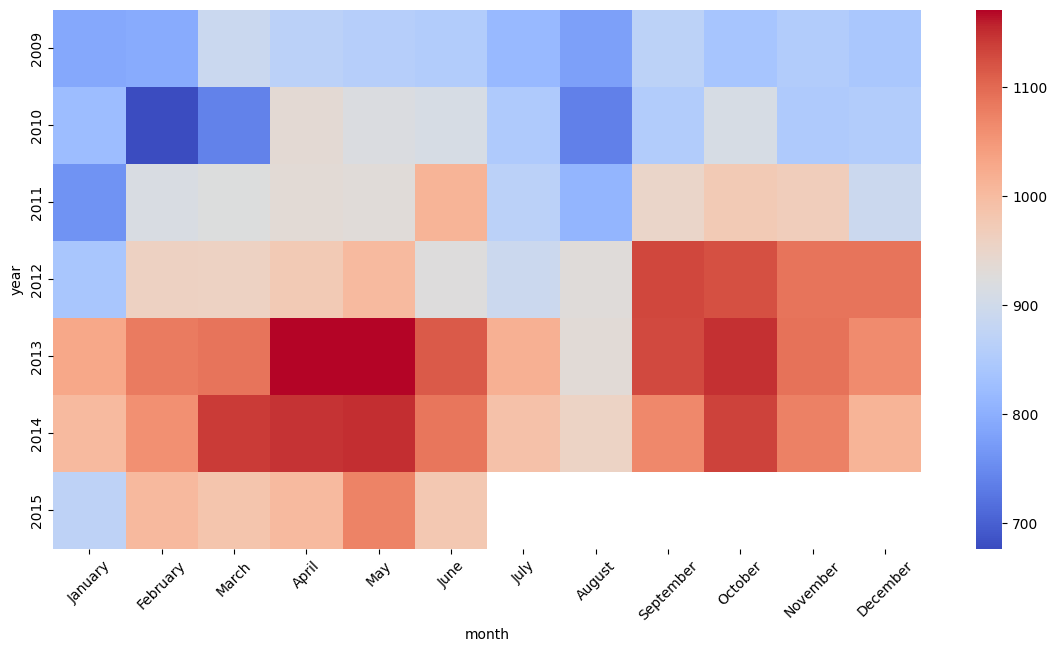

In [86]:
plt.figure(figsize=(14,7))
sns.heatmap(pivot_date,cmap='coolwarm')
plt.xticks(rotation=45)
plt.show()

In [87]:
x=fare_per_day['date']
y=fare_per_day['fare_amount']

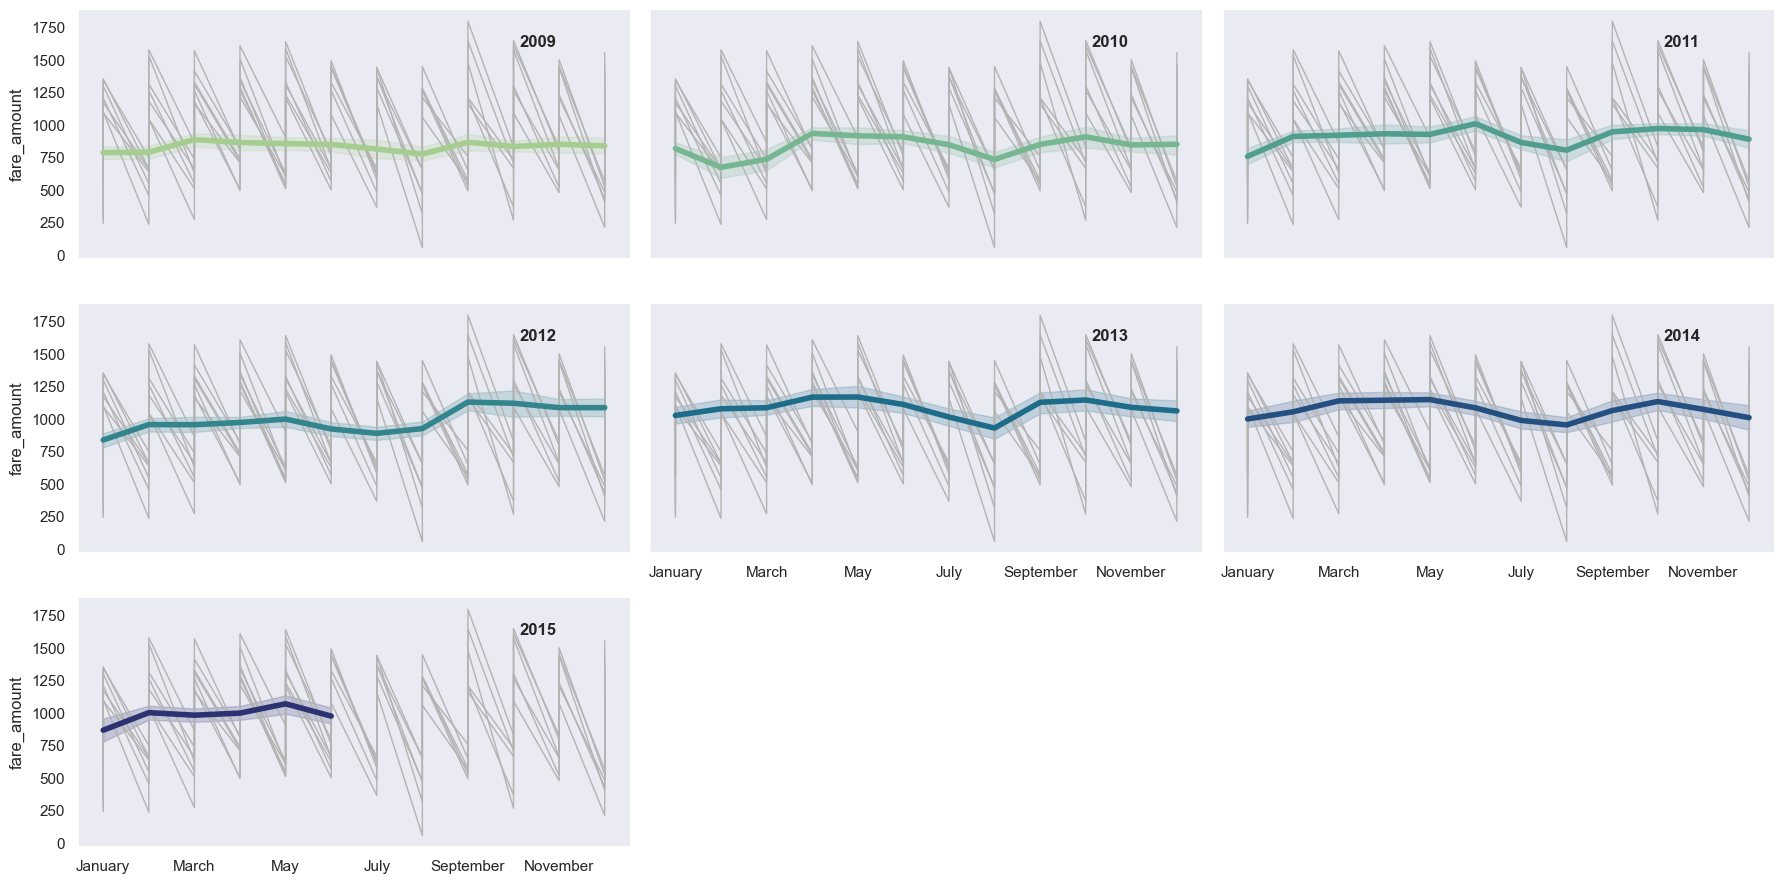

In [96]:
import seaborn as sns
sns.set_theme(style="dark")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=fare_per_day,
    x="month", y="fare_amount", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=3, aspect=2, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=fare_per_day, x="month", y="fare_amount", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "fare_amount")
g.tight_layout()

<Axes: xlabel='year', ylabel='fare_amount'>

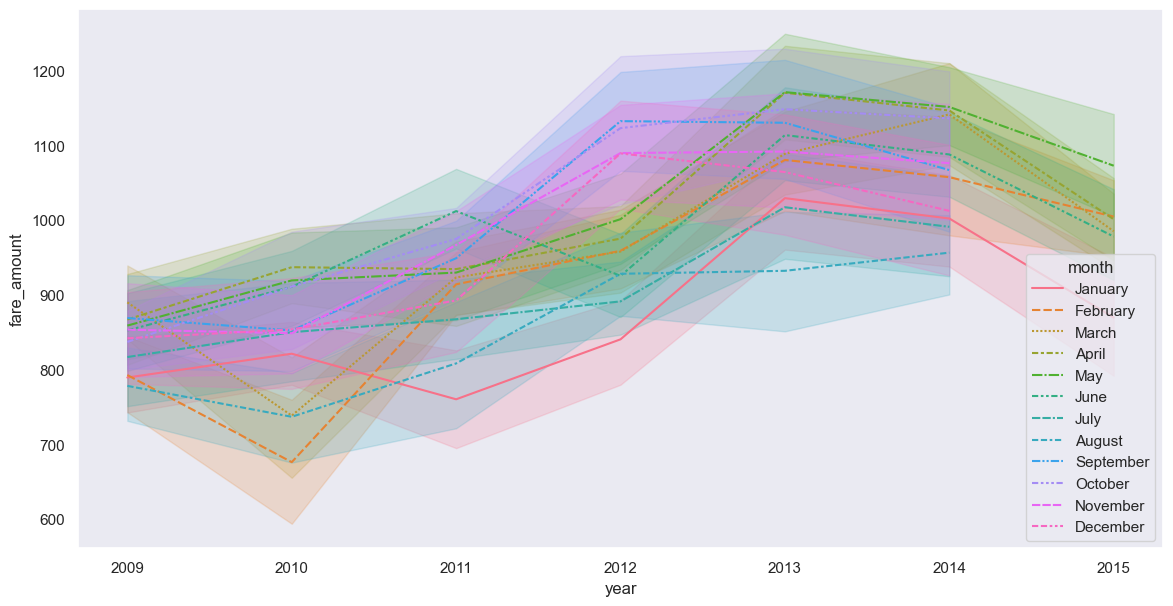

In [97]:
plt.figure(figsize=(14,7))
sns.lineplot(data=fare_per_day, x="year", y="fare_amount",hue='month',style='month')

[Text(122.12499999999999, 0.5, '')]

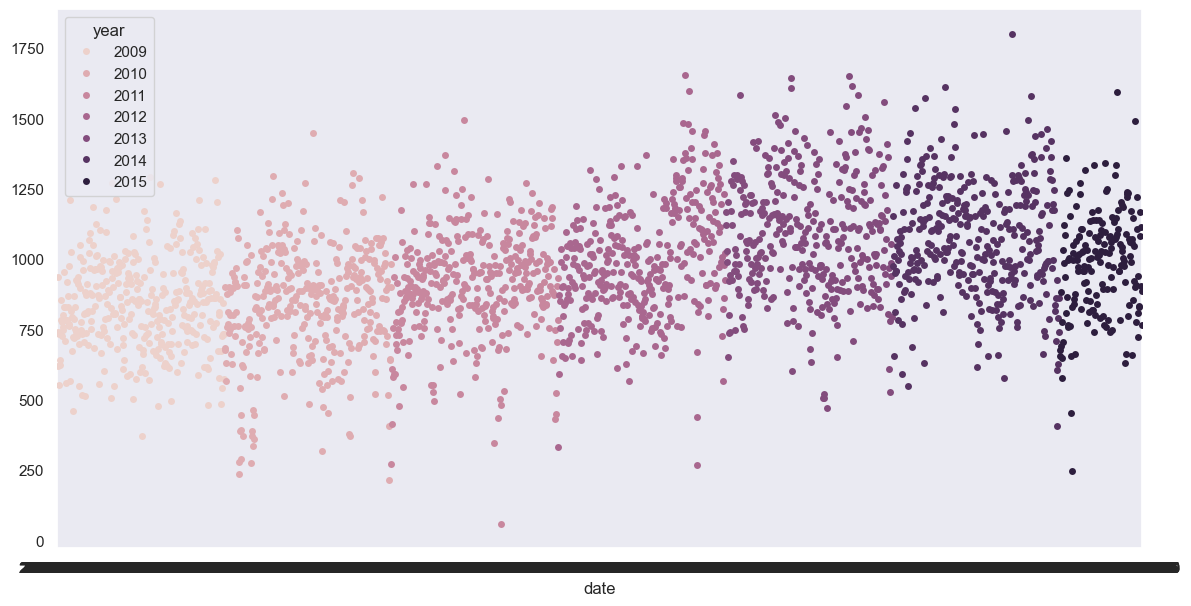

In [98]:
plt.figure(figsize=(14,7))
ax = sns.swarmplot(data=fare_per_day, x="date", y="fare_amount", hue="year")
ax.set(ylabel="")